In [1]:
from sklearn.datasets import load_sample_image
from sklearn.feature_extraction import image
from skimage import io

import numpy as np
import skimage.color
import skimage.io
import matplotlib.pyplot as plt

from os import listdir

In [58]:
######################################## FUNCTIONS ########################################

def extract_patches(path, size, patch_count) :
    img = io.imread(path)
    patches = image.extract_patches_2d(img, (size,size),max_patches=patch_count)
    return patches

def folder_patches(path, size = 100, patch_count = 50) :
    patches = np.ndarray((0,size,size))
    for file in listdir(path) :
        new_patches = extract_patches(data_dir+"/"+file, size, patch_count)
        patches = np.concatenate((patches, new_patches))
    return patches

def patch_show(patch) :
    io.imshow(patch)
    # les images de bases sont en unsigned 16 bits donc les pixels vont de 0 --> 65535
    histogramme, classes = np.histogram(patch, bins=65536)
    print(histogramme)

    plt.figure()
    plt.xlabel("pixel value")
    plt.ylabel("pixel count")
    plt.yscale('log')
    plt.plot(classes[0:-1], histogramme)
    plt.show()
    
def patches_stats(patches) :
    print("Il y a %s patches" %(len(patches)))
    
    averages = np.mean(patches,axis=(1,2))
    #np.mean (on choisit les images qui ont une moyenne assez élevée ?)
    #np.var (on choisit les images qui ont une forte variance, donc pas que tout blanc tout noir ?)
    histogramme, classes = np.histogram(averages, bins=65536)
    print(histogramme)

    plt.figure()
    plt.xlabel("average pixel value of a patch")
    plt.ylabel("pixel count")
    plt.yscale('log')
    plt.plot(classes[0:-1], histogramme)
    plt.show()
    

Il y a 190000 patches
[1 0 0 ... 0 0 1]


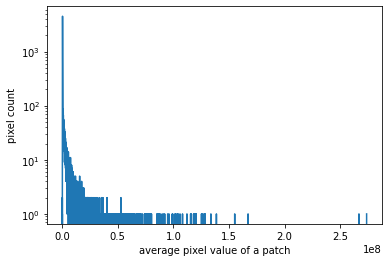

In [59]:
######################################## MAIN ########################################
data_dir = './Data/Good'

patches = folder_patches(data_dir,size=10,patch_count=10000)

# pour l'exemple je prends un patch au hasard:
#patch = patches[43]
#patch_show(patch)
patches_stats(patches)

In [ ]:
# la plus grosse diff entre un noyau et le reste c'est probablement le fait d'avoir des valeurs blanches >30000
# en faisant un truc du genre:
print(np.count_nonzero(patch > 30000))
# on peut avoir le nombre de pixel avec une valeur > 30 000 dans notre image

# On pourrait se dire que si y en a beaucoup (donc definir un seuil) on garde pas l'image